In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier as BlackBoxClassifier
from imblearn.under_sampling import ClusterCentroids

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, ax=ax, cmap="YlGnBu")
    # We want to show all ticks...
    ax.set(xticks=[0.5, 1.5],
           yticks=[0.5, 1.5],
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i in range(cm.shape[0]):
#         for j in range(cm.shape[1]):
#             ax.text(j, i, format(cm[i, j], fmt),
#                     ha="center", va="center",
#                     color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Validation

In [19]:
breast_cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [22]:
from sklearn.utils import shuffle
breast_cancer_data = load_breast_cancer()
data, target = shuffle(breast_cancer_data['data'], breast_cancer_data['target'])

breast_cancer_df = pd.DataFrame(data=np.c_[data, target],
                                columns=breast_cancer_data['feature_names'].tolist() + ['target'])
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,14.97,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.01939,0.1515,0.05266,...,25.82,102.30,782.1,0.1045,0.09995,0.07750,0.05754,0.2646,0.06085,1.0
1,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,...,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,1.0
2,12.10,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.03326,0.1937,0.06161,...,25.80,88.33,559.5,0.1432,0.17730,0.16030,0.06266,0.3049,0.07081,1.0
3,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,19.64,97.96,657.0,0.1275,0.31040,0.25690,0.10540,0.3387,0.09638,1.0
4,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,27.26,112.10,828.5,0.1153,0.34290,0.25120,0.13390,0.2534,0.07858,1.0


In [7]:
clf = BlackBoxClassifier()

In [23]:
cv_results = cross_validate(clf, data, target, cv=50)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [24]:
print("accuracy: {:.2f} +/- {:.2f} %".format(np.mean(cv_results["test_score"]), 2.*np.std(cv_results["test_score"])/np.sqrt(len(cv_results["test_score"]))))

accuracy: 0.96 +/- 0.02 %


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Normalized confusion matrix
[[0.86111111 0.13888889]
 [0.         1.        ]]


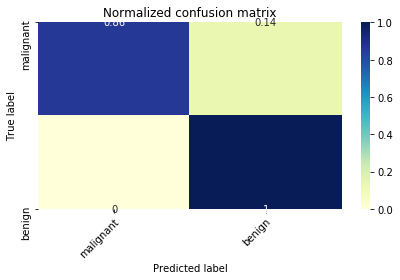

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    test_size=0.2, random_state=41)

clf = BlackBoxClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_confusion_matrix(y_test, y_pred, breast_cancer_data['target_names'],
                          normalize=True)

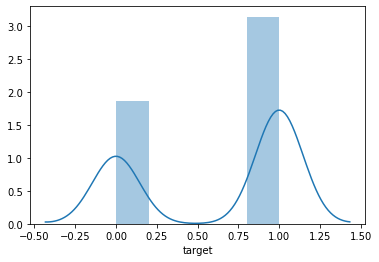

In [31]:
sns.distplot(breast_cancer_df['target'])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        36
           1       0.94      1.00      0.97        78

    accuracy                           0.96       114
   macro avg       0.97      0.93      0.95       114
weighted avg       0.96      0.96      0.96       114



In [36]:
clf.score(X_test, y_test)

0.956140350877193

In [37]:
clf.score(X_train, y_train)

0.9956043956043956

## Prediction